<a href="https://colab.research.google.com/github/SHEHAN-120/ocr-text-extraction-colab/blob/main/OCR_with_Python_and_Tesseract.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OCR with Python and Tesseract

# Text recognition in images

In [1]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [2]:
import pytesseract
import numpy as np
import cv2 # OpenCV
from google.colab.patches import cv2_imshow

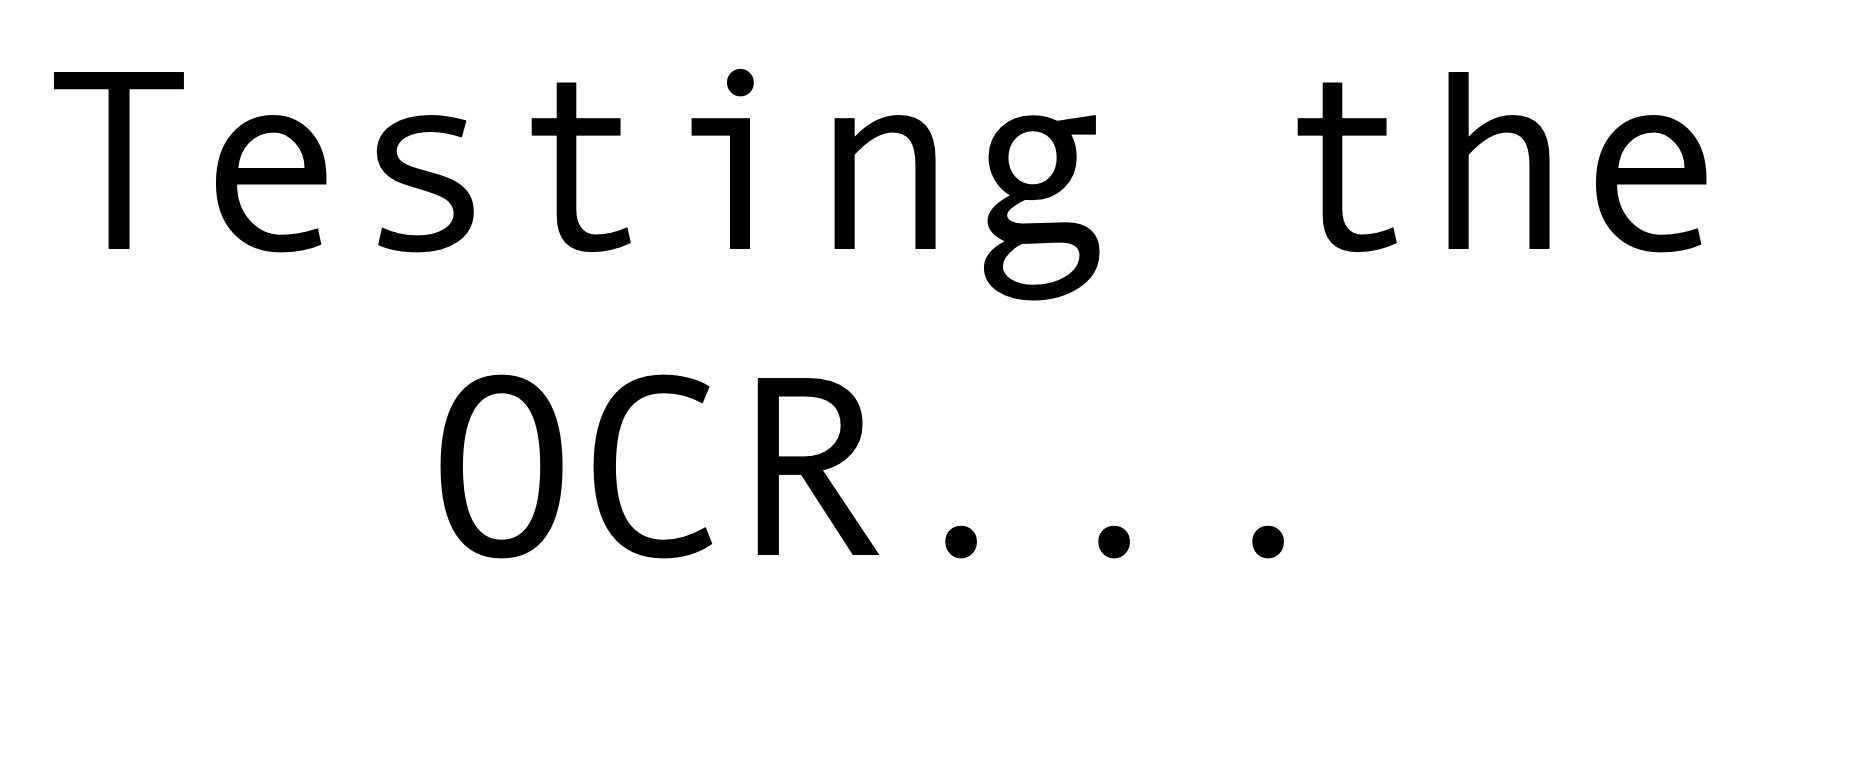

In [3]:
img = cv2.imread('/content/test01.jpg')
cv2_imshow(img) # BGR -> RGB

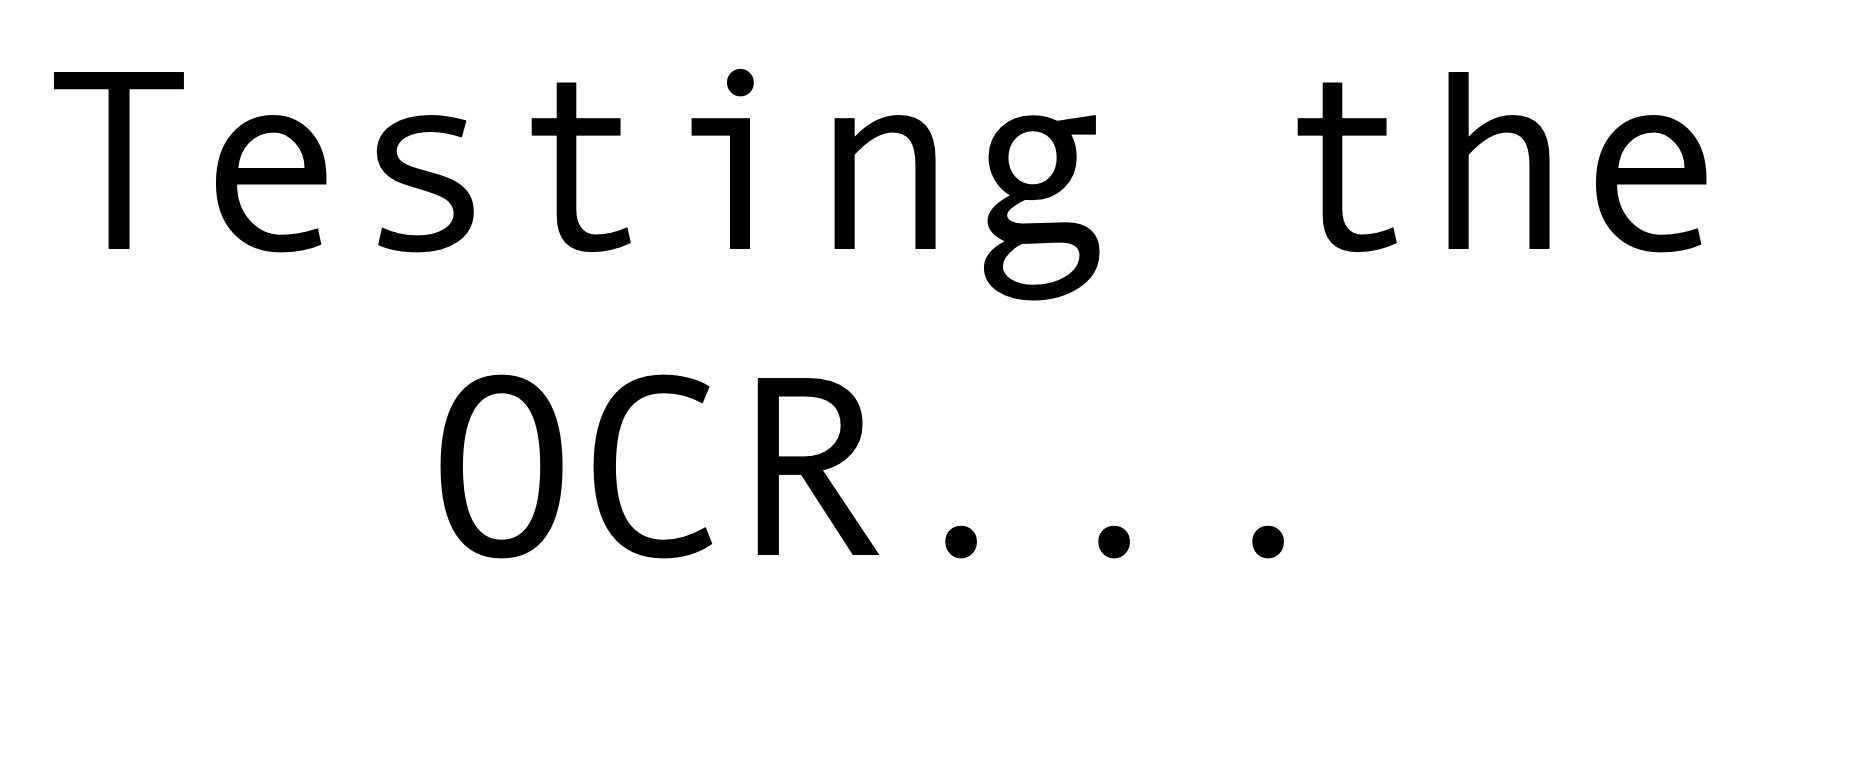

In [4]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [5]:
text = pytesseract.image_to_string(rgb)

In [6]:
text

'Testing the\nOCR...\n\x0c'

In [7]:
print(text)

Testing the
OCR...



## Deal with other languages

---



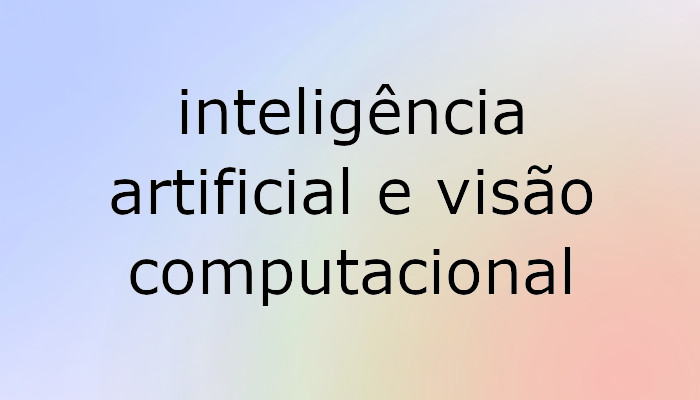

In [8]:
img = cv2.imread('/content/test02-02.jpg')
cv2_imshow(img)

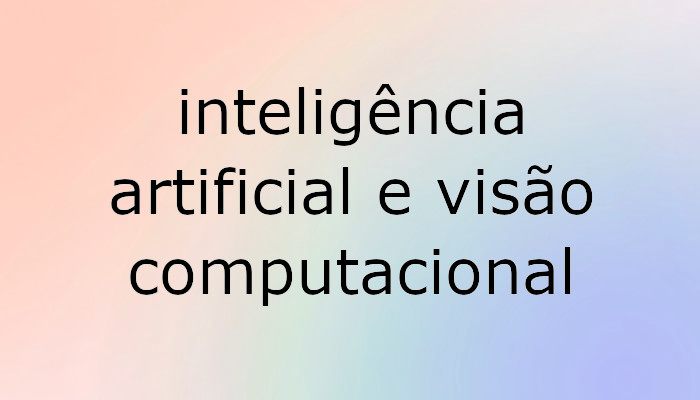

In [9]:
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [10]:
text = pytesseract.image_to_string(rgb)
print(text)

inteligéncia
artificial e visao
computacional



In [11]:
!tesseract --list-langs

List of available languages (2):
eng
osd


In [12]:
!apt-get install tesseract-ocr-por

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tesseract-ocr-por
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 856 kB of archives.
After this operation, 1,998 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-por all 1:4.00~git30-7274cfa-1.1 [856 kB]
Fetched 856 kB in 2s (415 kB/s)
Selecting previously unselected package tesseract-ocr-por.
(Reading database ... 126374 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-por_1%3a4.00~git30-7274cfa-1.1_all.deb ...
Unpacking tesseract-ocr-por (1:4.00~git30-7274cfa-1.1) ...
Setting up tesseract-ocr-por (1:4.00~git30-7274cfa-1.1) ...


In [13]:
!tesseract --list-langs

List of available languages (3):
eng
osd
por


In [14]:
text = pytesseract.image_to_string(rgb, lang='por')
print(text)

inteligência
artificial e visão
computacional



In [15]:
!mkdir tessdata

In [16]:
!wget -O ./tessdata/por.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true

--2025-09-08 07:53:08--  https://github.com/tesseract-ocr/tessdata/blob/main/por.traineddata?raw=true
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/por.traineddata [following]
--2025-09-08 07:53:08--  https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/por.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/por.traineddata [following]
--2025-09-08 07:53:09--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/por.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108

In [17]:
config_tesseract = '--tessdata-dir tessdata'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

inteligência
artificial e visão
computacional



In [18]:
!wget -O ./tessdata/eng.traineddata https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true

--2025-09-08 07:54:27--  https://github.com/tesseract-ocr/tessdata/blob/main/eng.traineddata?raw=true
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/eng.traineddata [following]
--2025-09-08 07:54:28--  https://github.com/tesseract-ocr/tessdata/raw/refs/heads/main/eng.traineddata
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/eng.traineddata [following]
--2025-09-08 07:54:28--  https://raw.githubusercontent.com/tesseract-ocr/tessdata/refs/heads/main/eng.traineddata
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108

In [19]:
!ls tessdata/

eng.traineddata  por.traineddata


## Parameters

In [20]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


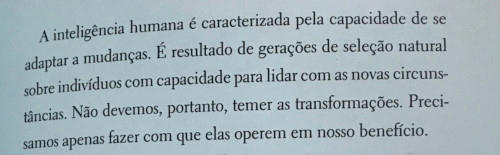

In [21]:
img = cv2.imread('/content/page-book.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [22]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças. É resultado de gerações de seleção natural
Sobre indivíduos com capacidade para lidar com as novas ciruns-
tâncias. Não devemos, portanto, temer as transformações. Preci-
samos apenas fazer com que elas operem em nosso benefício.



In [25]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

A inteligência humana é caracterizada pela capacidade de se
adaptar a mudanças. É resultado de gerações de seleção natural
Sobre indivíduos com capacidade para lidar com as novas ciruns-
tâncias. Não devemos, portanto, temer as transformações. Preci-
samos apenas fazer com que elas operem em nosso benefício.



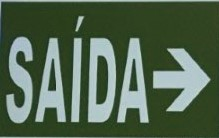

In [26]:
img = cv2.imread('/content/exit.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [29]:
config_tesseract = '--tessdata-dir tessdata --psm 7'
text = pytesseract.image_to_string(rgb, lang='por', config=config_tesseract)
print(text)

SAÍDA>



In [30]:
from PIL import Image
import matplotlib.pyplot as plt

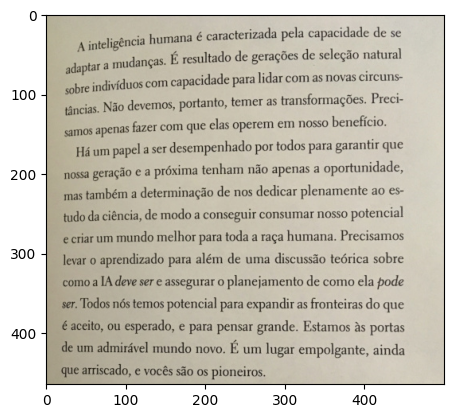

In [31]:
img = Image.open('/content/book01.jpg')
plt.imshow(img);

In [32]:
print(pytesseract.image_to_osd(img))

Page number: 0
Orientation in degrees: 0
Rotate: 0
Orientation confidence: 1.66
Script: Latin
Script confidence: 13.33



# Draw bounding boxes



In [33]:
from pytesseract import Output

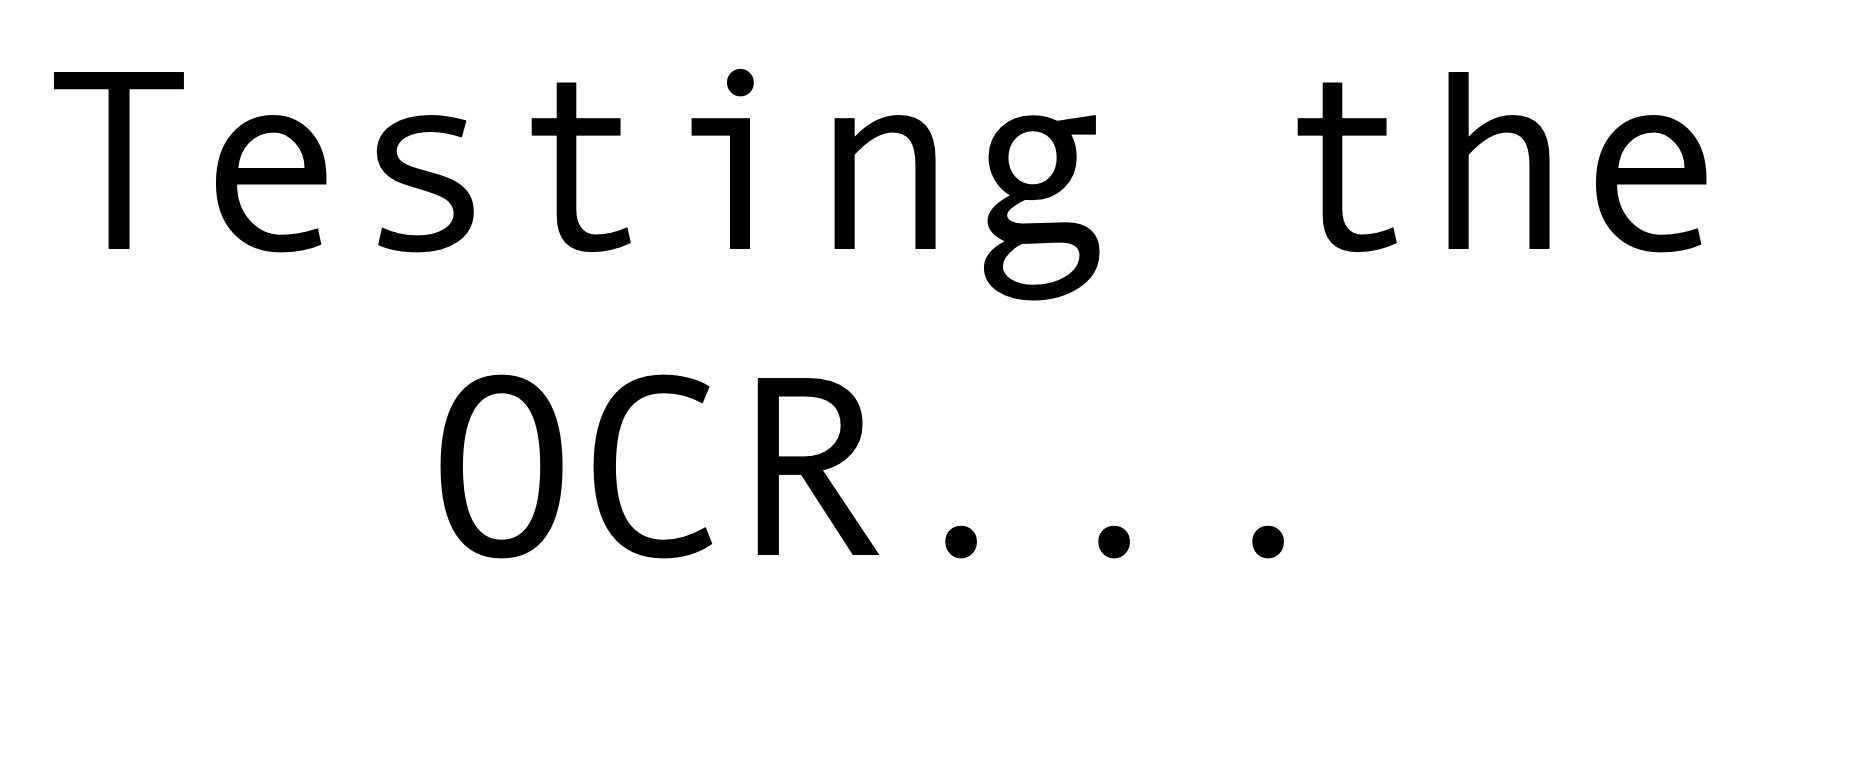

In [34]:
img = cv2.imread('/content/test01.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [35]:
config_tesseract = '--tessdata-dir tessdata'
result = pytesseract.image_to_data(rgb, config=config_tesseract, lang='eng', output_type=Output.DICT)
result

{'level': [1, 2, 3, 4, 5, 5, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 2, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 2, 0, 1, 2],
 'left': [0, 54, 54, 54, 54, 1298, 441, 441, 974],
 'top': [0, 69, 69, 69, 69, 72, 375, 370, 370],
 'width': [1859, 1652, 1652, 1652, 1046, 408, 843, 534, 161],
 'height': [763, 489, 489, 231, 231, 180, 183, 239, 239],
 'conf': [-1, -1, -1, -1, 88, 92, -1, 89, 90],
 'text': ['', '', '', '', 'Testing', 'the', '', 'OCR.', '..']}

In [36]:
result['text'], len(result['text'])

(['', '', '', '', 'Testing', 'the', '', 'OCR.', '..'], 9)

In [37]:
def bouding_box(result, img, i, color = (255,100,0)):
  x = result['left'][i]
  y = result['top'][i]
  w = result['width'][i]
  h = result['height'][i]

  cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)

  return x, y, img

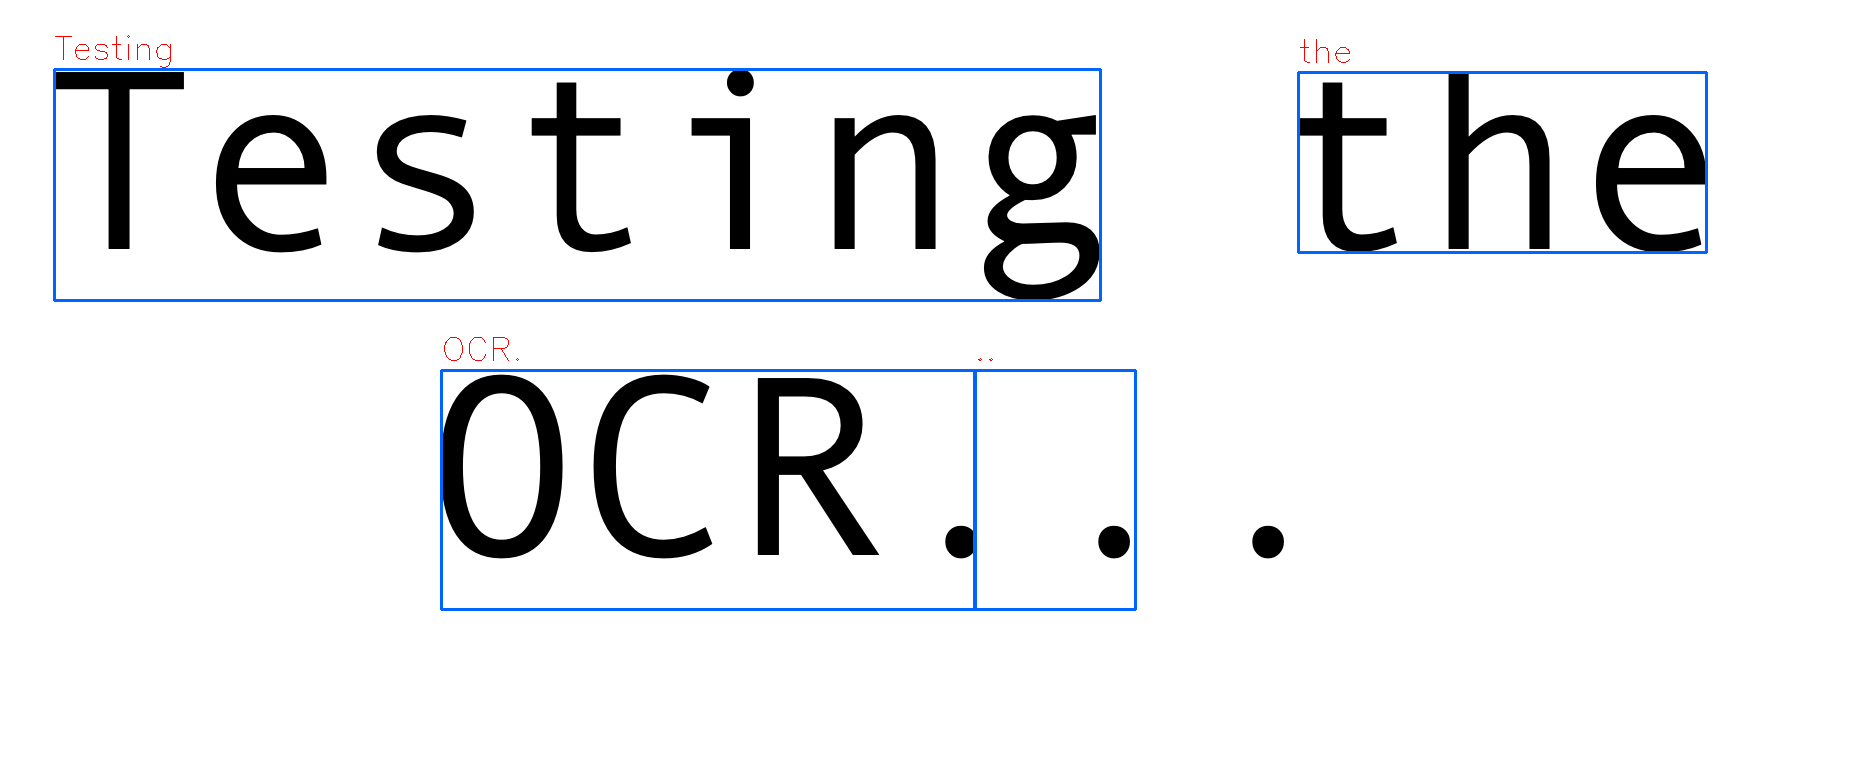

In [40]:
min_confidence = 40
img_copy = rgb.copy()
for i in range(0, len(result['text'])):
  #print(i)
  confidence = int(result['conf'][i])
  #print(confidence)
  if confidence > min_confidence:
    #print(confidence)
    x, y, img = bouding_box(result, img_copy, i)
    #print(x,y)
    text = result['text'][i]
    cv2.putText(img_copy, text, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
cv2_imshow(img_copy)

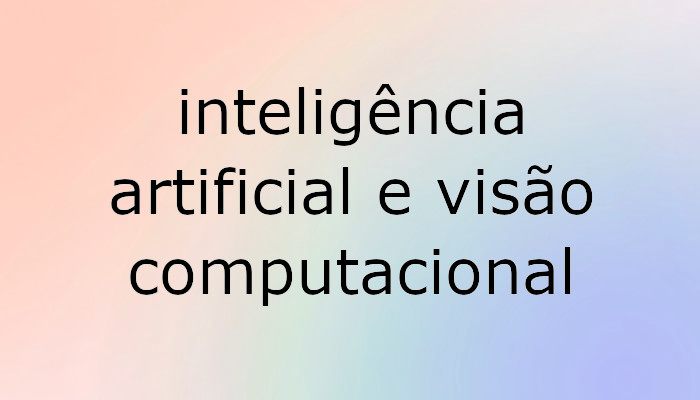

In [41]:
img = cv2.imread('/content/test02-02.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [46]:
config_tesseract = '--tessdata-dir tessdata'
result = pytesseract.image_to_data(rgb, config=config_tesseract, lang = 'por', output_type = Output.DICT)
result

{'level': [1, 2, 3, 4, 5, 4, 5, 5, 5, 4, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 2, 2, 2, 2, 3, 3],
 'word_num': [0, 0, 0, 0, 1, 0, 1, 2, 3, 0, 1],
 'left': [0, 111, 111, 182, 182, 111, 111, 380, 437, 130, 130],
 'top': [0, 84, 84, 84, 84, 165, 167, 179, 165, 247, 247],
 'width': [700, 481, 481, 341, 341, 481, 237, 30, 155, 440, 440],
 'height': [400, 222, 222, 62, 62, 50, 48, 36, 50, 59, 59],
 'conf': [-1, -1, -1, -1, 91, -1, 88, 93, 91, -1, 91],
 'text': ['',
  '',
  '',
  '',
  'inteligência',
  '',
  'artificial',
  'e',
  'visão',
  '',
  'computacional']}

In [47]:
from PIL import ImageFont, ImageDraw, Image
font = '/content/calibri.ttf'

In [48]:
def write_text(text, x, y, img, font, font_size = 32):
  font = ImageFont.truetype(font, font_size)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - font_size), text, font = font)
  img = np.array(img_pil)
  return img

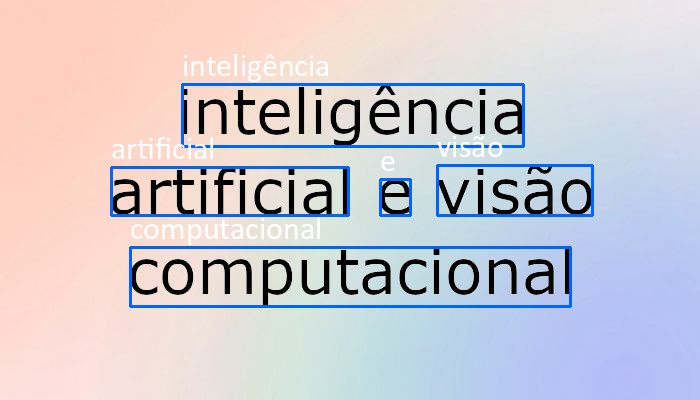

In [49]:
min_confidence = 40
img_copy = rgb.copy()
for i in range(0, len(result['text'])):
  confidence = int(result['conf'][i])
  if confidence > min_confidence:
    x, y, img = bouding_box(result, img_copy, i)
    text = result['text'][i]
    img_copy = write_text(text, x, y, img_copy, font)
cv2_imshow(img_copy)

# Searching specific information

In [62]:
import re

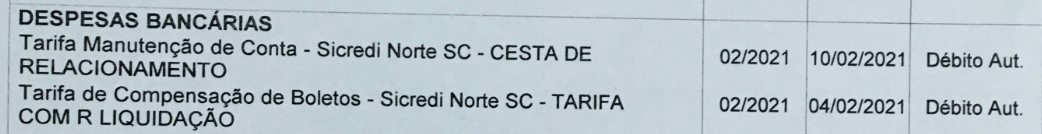

In [51]:
img = cv2.imread('/content/table_test.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [52]:
result = pytesseract.image_to_data(rgb, config=config_tesseract, lang='por', output_type=Output.DICT)
result

{'level': [1,
  2,
  3,
  4,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  4,
  5,
  4,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  2,
  3,
  4,
  5,
  5,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  3,
  3,
  3],
 'par_num': [0,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  

In [63]:
date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

<>:1: SyntaxWarning: invalid escape sequence '\d'
<>:1: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-2759339913.py:1: SyntaxWarning: invalid escape sequence '\d'
  date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'


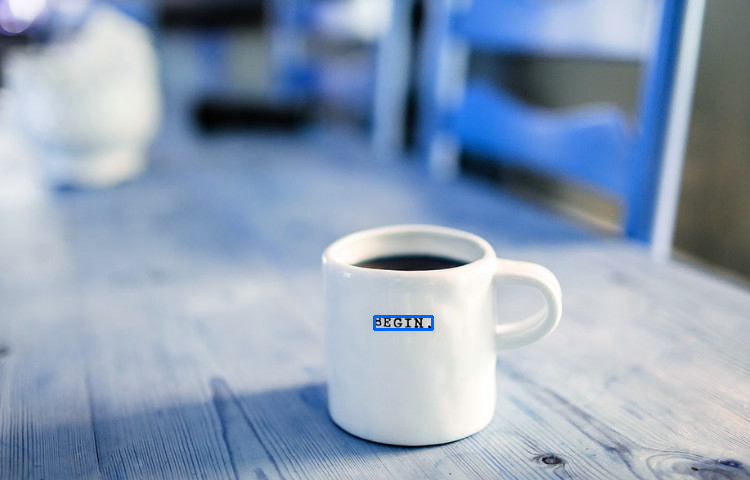

In [64]:
dates = []
min_confidence = 40
img_copy = rgb.copy()
for i in range(0, len(result['text'])):
  confidence = int(result['conf'][i])
  if confidence > min_confidence:
    text = result['text'][i]
    if re.match(date_pattern, text):
      x, y, img = bouding_box(result, img_copy, i, (0,0,255))
      img_copy = write_text(text, x, y, img_copy, font, 12)
      dates.append(text)
    else:
      x, y, img_copy = bouding_box(result, img_copy, i)
cv2_imshow(img_copy)

In [56]:
dates

['10/02/2021', '04/02/2021']

# Detecting texts in natural scenarios

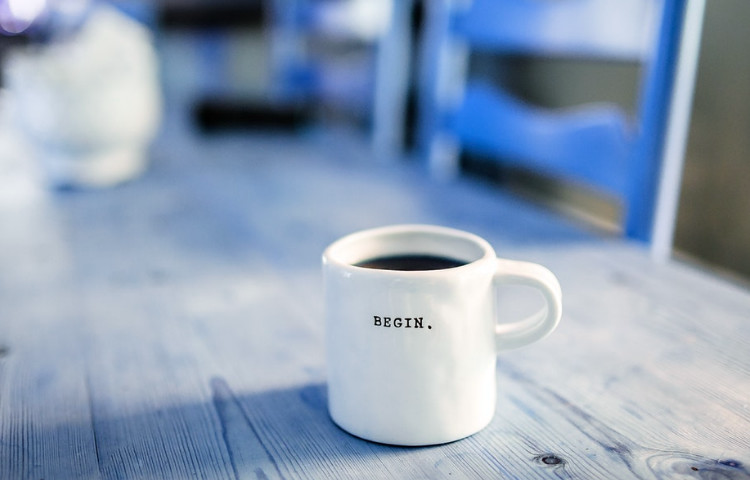

In [57]:
img = cv2.imread('/content/cup.jpg')
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
cv2_imshow(rgb)

In [58]:
config_tesseract = "--tessdata-dir tessdata --psm 11"
result = pytesseract.image_to_data(rgb, config=config_tesseract, lang = 'eng', output_type=Output.DICT)
result

{'level': [1, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 4],
 'par_num': [0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1],
 'word_num': [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2],
 'left': [0,
  0,
  0,
  0,
  0,
  374,
  374,
  374,
  374,
  169,
  169,
  169,
  169,
  287,
  287,
  287,
  287,
  360],
 'top': [0,
  0,
  0,
  0,
  25,
  316,
  316,
  316,
  316,
  397,
  397,
  397,
  397,
  404,
  404,
  404,
  444,
  399],
 'width': [750,
  642,
  642,
  642,
  54,
  58,
  58,
  58,
  58,
  69,
  69,
  69,
  69,
  178,
  178,
  178,
  28,
  52],
 'height': [480,
  161,
  161,
  161,
  64,
  13,
  13,
  13,
  13,
  83,
  83,
  83,
  83,
  61,
  61,
  61,
  21,
  77],
 'conf': [-1,
  -1,
  -1,
  -1,
  28,
  -1,
  -1,
  -1,
  86,
  -1,
  -1,
  -1,
  0,
  -1,


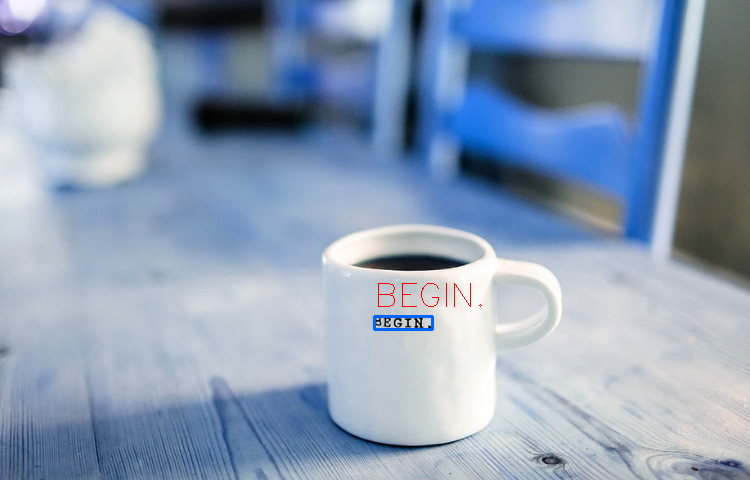

In [59]:
min_confidence = 40
img_copy = rgb.copy()
for i in range(0, len(result['text'])):
  confidence = int(result['conf'][i])
  if confidence > min_confidence:
    text = result['text'][i]
    if not text.isspace() and len(text) > 0:
      x, y, img = bouding_box(result, img_copy, i)
      cv2.putText(img_copy, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.1, (0,0,255))
cv2_imshow(img_copy)

In [60]:
result['conf']

[-1, -1, -1, -1, 28, -1, -1, -1, 86, -1, -1, -1, 0, -1, -1, -1, 27, 16]

In [61]:
result['text']

['',
 '',
 '',
 '',
 'T',
 '',
 '',
 '',
 'BEGIN.',
 '',
 '',
 '',
 'i',
 '',
 '',
 '',
 '|',
 '—-—']